In [1]:
%matplotlib inline
#
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random as rng
import skimage
import ipywidgets as widgets
import statistics 
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import figure, subplot
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from skimage import data, exposure, io, filters, feature, measure
from skimage.color import rgb2gray

In [2]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    # apply gamma correction using the lookup table
    return cv.LUT(image, table)

In [3]:
def draw_easy(dst=135, v=1.25, x=6):
    filename = "latwe{}".format(x)
    img = io.imread('../res/'+filename+'.jpg')
    image = adjust_gamma(img, v)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)
    
    #thresh = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    thresh = cv.threshold(sharpen,dst,255,cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    #plt.imshow(close)
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    min_area = 0
    max_area = 10000
    fields = []
    
    for c in cnts:
        area = cv.contourArea(c)
        fields.append(area)
    check = True
    if check:
        index = fields.index(max(fields))
        del cnts[index]
        del fields[index]
        biggest = max(fields)
        average = sum(fields)/len(fields)
        image_number = 0
        
    fields2 = fields.copy()
    dlugosc = len(fields2)
    i = 0
    while(i < dlugosc):
        if fields2[i] < max(fields2)//2:
            del fields2[i]
            del cnts[i]
            dlugosc-=1
        else:
            i+=1
    
    zooms = []
    coords = []
    for i, j in zip(cnts, fields2):
        if j > average :
            x,y,w,h = cv.boundingRect(i)
            zoom = image[y:y+h, x:x+h]
            coords.append([y+h//2, x+h//2])
            #cv.imwrite('zoom_{}.png'.format(image_number), zoom)
            #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2) #rysowanie gownokwadratow
            zooms.append(zoom)
            image_number += 1
    plt.imshow(zooms[0])
    return zooms, coords
interact(draw_easy, dst=(0.0,255.0,1.0), v=(0.5,4.0,0.25), x=(0,6,1))

interactive(children=(FloatSlider(value=135.0, description='dst', max=255.0, step=1.0), FloatSlider(value=1.25…

<function __main__.draw_easy(dst=135, v=1.25, x=6)>

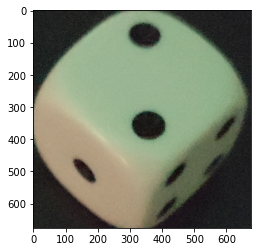

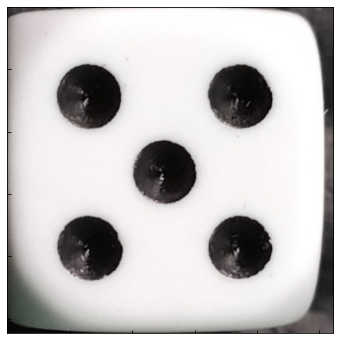

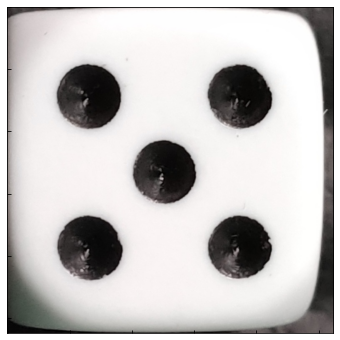

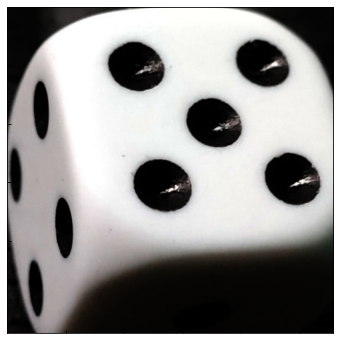

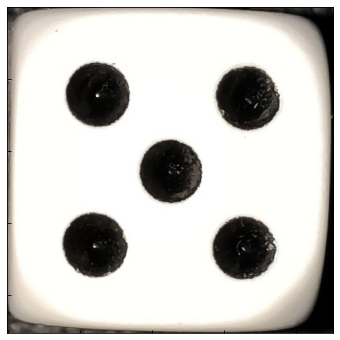

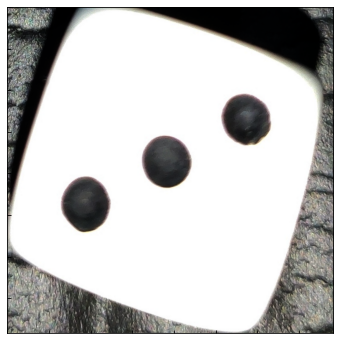

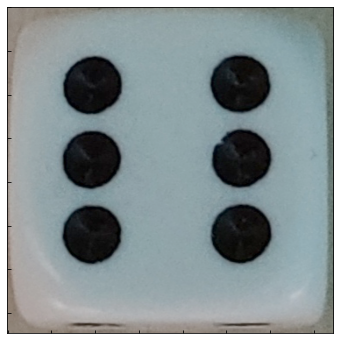

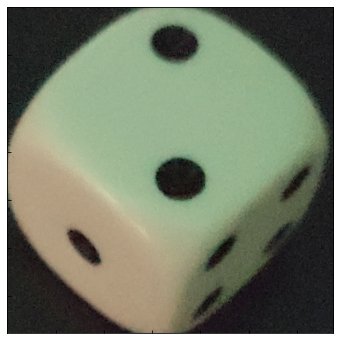

In [4]:
#zoomed
easy0_zoom, easy0_contours = draw_easy(135, 1, 0)
easy1_zoom, easy1_contours = draw_easy(135, 1, 1)
easy2_zoom, easy2_contours = draw_easy(135, 0.5, 2)
easy3_zoom, easy3_contours = draw_easy(135, 0.5, 3)
easy4_zoom, easy4_contours = draw_easy(155, 0.5, 4)
easy5_zoom, easy5_contours = draw_easy(135, 1.25, 5)
easy6_zoom, easy6_contours = draw_easy(135, 1.25, 6)

zooms_list = [easy0_zoom, easy1_zoom, easy2_zoom, easy3_zoom, easy4_zoom, easy5_zoom, easy6_zoom]
contours_list = [easy0_contours, easy1_contours, easy2_contours, easy3_contours, easy4_contours, easy5_contours, easy6_contours]
p1 = [500, 300, 300, 300, 200, 200, 200]
p2 = [20, 20, 25, 25, 25, 14, 15]
for i in range(0, len(zooms_list)):
    figure(figsize=(6,6))
    ax = subplot(1,1,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    plt.imshow(zooms_list[i][0])
    cv.imwrite("../zoomed/latwe{}_zoom.jpg".format(i), zooms_list[i][0])

In [5]:
def policzone_oczka(img, indi, base_img_coords, indexior):
    font = cv.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (base_img_coords[0][1], base_img_coords[0][0])
    fontScale = 12
    fontColor = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    lineType = 40
    output = str(indi)
    cv.putText(img, output, bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
    io.imshow(img)
    cv.imwrite("../easy_count/latwe{}_number.jpg".format(indexior), img)

def kosteczki(image, indexior, base_img_coords, original):
    image = adjust_gamma(img, 1.0)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)

    #thresh = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    thresh = cv.threshold(sharpen,130,255,cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)

    #plt.imshow(close)
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    fields_list = []
    approx_list = []
    x_list = []
    y_list = []
    for c in cnts:
        area = cv.contourArea(c)
        if area > 400:
            approx = cv.approxPolyDP(c, 0.02*cv.arcLength(c, True), True)
            approx_list.append(approx)
            x_list.append(approx.ravel()[0])
            y_list.append(approx.ravel()[1])
            fields_list.append(area)

    zip_list1 = zip(fields_list, approx_list)
    zip_list2 = zip(fields_list, x_list)
    zip_list3 = zip(fields_list, y_list)

    sorted_zip_list1 = sorted(zip_list1)
    sorted_zip_list2 = sorted(zip_list2)
    sorted_zip_list3 = sorted(zip_list3)

    approx_list = [element for _, element in sorted_zip_list1]
    x_list = [element for _, element in sorted_zip_list2]
    y_list = [element for _, element in sorted_zip_list3]
    fields_list = sorted(fields_list)

    mediana = statistics.median(fields_list)
    indi=0
    for i in range(0, len(fields_list)):
        if max(fields_list) > fields_list[i] and fields_list[i] > 1000:
            if (len(approx_list[i]) == 8 or len(approx_list[i]) == 9) and abs(fields_list[i] - mediana) < 0.5*mediana:
                cv.drawContours(img, [approx_list[i]], 0, (255, 0, 0), 5)
                indi+=1
    figure(figsize=(6,6))
    ax = subplot(1,1,1)
    ax.tick_params(direction='in',labelleft=False, labelbottom = False, labelright = False)
    #wyświetlanie kostek
    #io.imshow(img)
    cv.imwrite("../contours/latwe{}_contours.jpg".format(indexior), img)
    policzone_oczka(original, indi, base_img_coords, indexior)
    
    #sprawdzanie pól i dlugosci approx
    #if indexior == 4:
    #    print(fields_list)
    #    for i in approx_list:
    #        print(len(i))

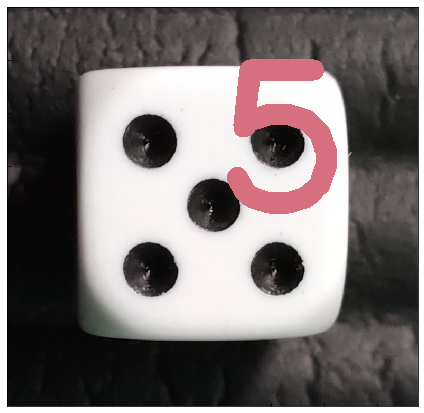

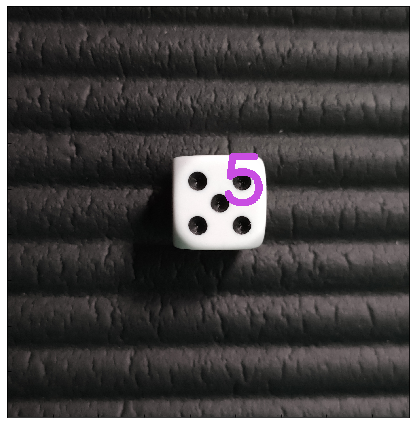

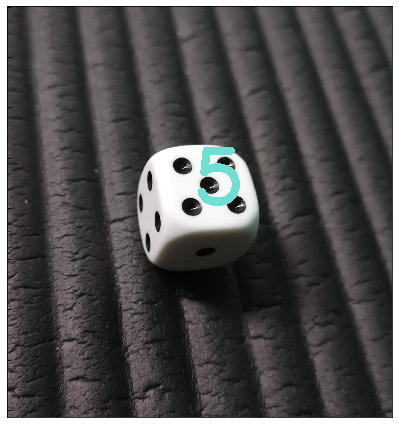

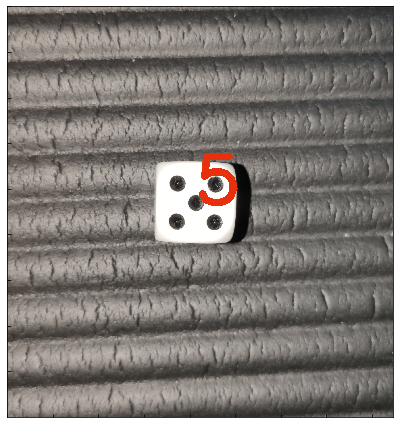

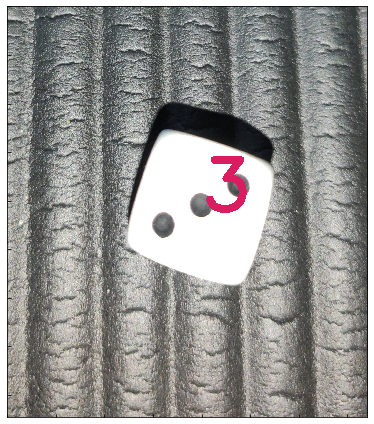

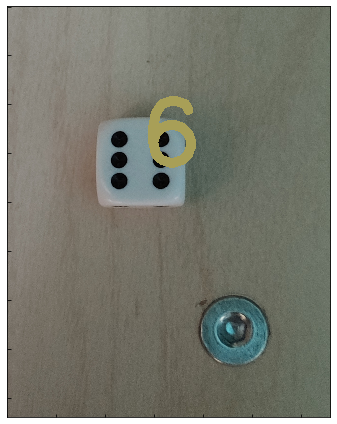

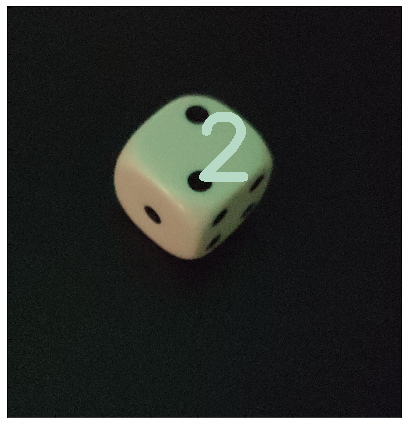

In [6]:
for i in range(0, 7):
    filename = "latwe{}_zoom".format(i)
    img = io.imread('../zoomed/'+filename+'.jpg')
    original = io.imread('../res/latwe{}.jpg'.format(i))
    kosteczki(img, i, contours_list[i], original)

In [7]:
#TODO
def draw_medium(dst=160, v=1.25, x=13):
    filename = "projekt{}".format(x)
    img = io.imread('../res/'+filename+'.jpg')
    image = adjust_gamma(img, v)
    gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    blur = cv.medianBlur(gray, 5)
    sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpen = cv.filter2D(blur, -1, sharpen_kernel)
    
    #thresh = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)
    thresh = cv.threshold(sharpen,dst,255,cv.THRESH_BINARY_INV)[1]
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (3,3))
    close = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel, iterations=2)
    
    plt.imshow(close)
    
    cnts = cv.findContours(close, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    min_area = 0
    max_area = 10000
    fields = []
    
    for c in cnts:
        area = cv.contourArea(c)
        fields.append(area)
    check = True
    if check:
        index = fields.index(max(fields))
        del cnts[index]
        del fields[index]
        biggest = max(fields)
        average = sum(fields)/len(fields)
        image_number = 0
        
    fields2 = fields.copy()
    dlugosc = len(fields2)
    i = 0
    while(i < dlugosc):
        if fields2[i] < max(fields2)//2:
            del fields2[i]
            del cnts[i]
            dlugosc-=1
        else:
            i+=1
    
    zooms = []
    coords = []
    for i, j in zip(cnts, fields2):
        if j > average:
            x,y,w,h = cv.boundingRect(i)
            zoom = image[y:y+h, x:x+h]
            coords.append([y+h//2, x+h//2])
            #cv.imwrite('zoom_{}.png'.format(image_number), zoom)
            #cv.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2) #rysowanie gownokwadratow
            zooms.append(zoom)
            image_number += 1
            
    print(len(zooms))
    #figure(figsize=(6,6))
    for i in range(0, len(zooms)):
        figure(figsize=(6,6))
        ax = subplot(1,1,1)
        plt.imshow(zooms[i])
    #plt.imshow(zooms[0])
    #return zooms, coords
#interact(draw_medium, dst=(0.0,255.0,1.0), v=(0.5,4.0,0.25), x=(10,18,1))